In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.layers.normalization import BatchNormalization

from sklearn.model_selection import train_test_split

In [50]:
# Load train data
train_data = pd.read_csv('data/train.csv')

train_label = train_data['label']
train_data = train_data.drop('label', axis=1)

train_data = train_data / 255

train_data.shape, train_label.shape

((42000, 784), (42000,))

In [51]:
# Load test data
test_data = pd.read_csv('data/test.csv')
test_data = test_data / 255

test_data.shape

(28000, 784)

In [52]:
# Reshape Data to 28 x 28; add channel
train_data = np.reshape(np.array(train_data), (42000, 28, 28, 1))
test_data  = np.reshape(np.array(test_data), (28000, 28, 28, 1))

In [53]:
train_data.shape, train_label.shape, test_data.shape

((42000, 28, 28, 1), (42000,), (28000, 28, 28, 1))

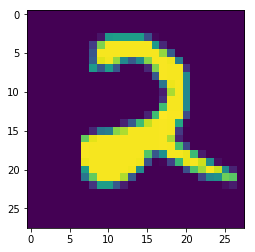

In [54]:
plt.figure()
plt.imshow(train_data[1210].reshape(28, 28), interpolation='nearest')
plt.show()

In [55]:
train_label[1210]

2

In [56]:
train_data.shape

(42000, 28, 28, 1)

In [57]:
#Split train data
X_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.20, random_state=11)

In [58]:
X_train.shape, x_test.shape, y_train.shape, y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600,), (8400,))

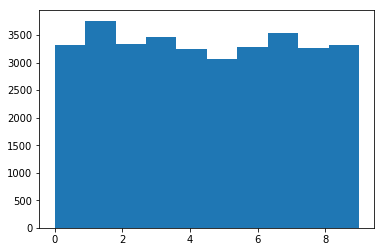

In [60]:
plt.figure()
plt.hist(y_train[:])
plt.show()

In [74]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [75]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [64]:
# Convert labels to one-hot vector
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [76]:
# Fit
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
33600/33600 [==============================] - 96s 3ms/step - loss: 0.3094 - acc: 0.9081
Epoch 2/10
33600/33600 [==============================] - 129s 4ms/step - loss: 0.0816 - acc: 0.9757
Epoch 3/10
33600/33600 [==============================] - 77s 2ms/step - loss: 0.0587 - acc: 0.9827
Epoch 4/10
33600/33600 [==============================] - 67s 2ms/step - loss: 0.0464 - acc: 0.9856
Epoch 5/10
33600/33600 [==============================] - 68s 2ms/step - loss: 0.0415 - acc: 0.9874
Epoch 6/10
33600/33600 [==============================] - 65s 2ms/step - loss: 0.0360 - acc: 0.9887
Epoch 7/10
33600/33600 [==============================] - 67s 2ms/step - loss: 0.0323 - acc: 0.9904
Epoch 8/10
33600/33600 [==============================] - 66s 2ms/step - loss: 0.0296 - acc: 0.9912
Epoch 9/10
33600/33600 [==============================] - 67s 2ms/step - loss: 0.0273 - acc: 0.9920
Epoch 10/10
33600/33600 [==============================] - 67s 2ms/step - loss: 0.0267 - acc: 0.991

```
Epoch 1/10
33600/33600 [==============================] - 96s 3ms/step - loss: 0.3094 - acc: 0.9081
Epoch 2/10
33600/33600 [==============================] - 129s 4ms/step - loss: 0.0816 - acc: 0.9757
Epoch 3/10
33600/33600 [==============================] - 77s 2ms/step - loss: 0.0587 - acc: 0.9827
Epoch 4/10
33600/33600 [==============================] - 67s 2ms/step - loss: 0.0464 - acc: 0.9856
Epoch 5/10
33600/33600 [==============================] - 68s 2ms/step - loss: 0.0415 - acc: 0.9874
Epoch 6/10
33600/33600 [==============================] - 65s 2ms/step - loss: 0.0360 - acc: 0.9887
Epoch 7/10
33600/33600 [==============================] - 67s 2ms/step - loss: 0.0323 - acc: 0.9904
Epoch 8/10
33600/33600 [==============================] - 66s 2ms/step - loss: 0.0296 - acc: 0.9912
Epoch 9/10
33600/33600 [==============================] - 67s 2ms/step - loss: 0.0273 - acc: 0.9920
Epoch 10/10
33600/33600 [==============================] - 67s 2ms/step - loss: 0.0267 - acc: 0.9918
```

In [77]:
model.evaluate(x_test, y_test)

8400/8400 [==============================] - 6s 682us/step


[0.029185955096973408, 0.9914285714285714]

```[0.029185955096973408, 0.9914285714285714]```

In [78]:
predictions = model.predict_classes(test_data)

In [79]:
predictions[2000]

8

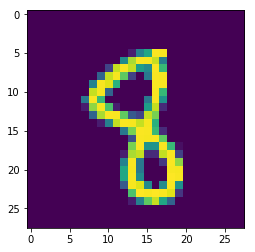

In [80]:
test_data[0].reshape(28, 28)

plt.figure()
plt.imshow(test_data[2000].reshape(28, 28), interpolation='nearest')
plt.show()

In [81]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("keras-20181119.csv", index=False, header=True)


```
0.99385 in Kaggle digit recognizer competition
```